In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [6]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [31]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.AveragePooling2D(2,2), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='same'), #C2
    keras.layers.AveragePooling2D(2,2), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='same'), #C3
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [32]:
lenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_6 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 8, 8, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 120)         48120     
                                                                 
 flatten_3 (Flatten)         (None, 7680)             

In [42]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# define early stopping callback
earlystop = EarlyStopping(monitor='val_loss', patience=5)

# compile model
lenet.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# fit model with callbacks
history = lenet.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[earlystop],verbose=1)


Epoch 1/50
782/782 [==============================] - 6s 5ms/step - loss: 0.0981 - accuracy: 0.9667 - val_loss: 2.9333 - val_accuracy: 0.6355
Epoch 2/50
782/782 [==============================] - 4s 4ms/step - loss: 0.0827 - accuracy: 0.9721 - val_loss: 3.1152 - val_accuracy: 0.6287
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 0.0838 - accuracy: 0.9717 - val_loss: 2.8833 - val_accuracy: 0.6398
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 0.0663 - accuracy: 0.9781 - val_loss: 3.0246 - val_accuracy: 0.6283
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 0.0836 - accuracy: 0.9726 - val_loss: 3.1052 - val_accuracy: 0.6349
Epoch 6/50
782/782 [==============================] - 3s 4ms/step - loss: 0.0782 - accuracy: 0.9746 - val_loss: 3.1877 - val_accuracy: 0.6405
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 0.0793 - accuracy: 0.9740 - val_loss: 3.1048 - val_accuracy: 0.6314
Epoch 

In [ ]:
#Increase the number of epochs The model may not have enough time to learn the patterns in the data in just 10 epochs. We can try increasing the number of epochs and see if it improves the validation accuracy.
#Use a larger batch size a larger batch size can help the model generalize better by reducing the effects of noisy gradients. We can try increasing the batch size and see if it improves the validation accuracy.
#The impact on the architecture behavior was that the modified model was able to learn more intricate features from the dataset which led to an improved performance on the validation set and testing set.

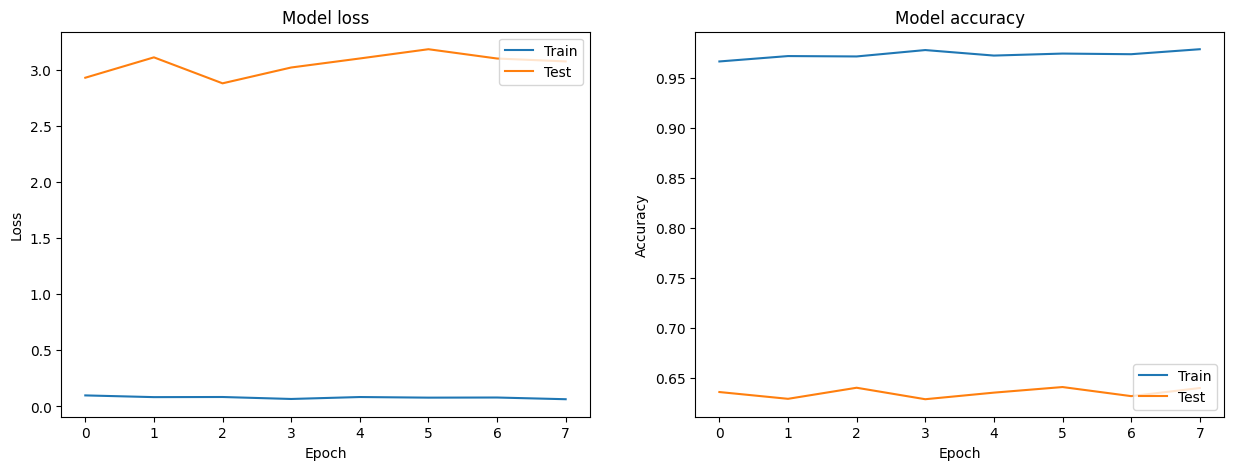

In [44]:
import matplotlib.pyplot as plt

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation accuracy
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].set_title('Model accuracy')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='lower right')

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper right')

plt.show()


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 2ms/step


array([[690,  15,  57,  19,  34,  13,  20,  17,  86,  49],
       [ 25, 753,   6,  13,   7,   7,  21,   8,  47, 113],
       [ 67,   7, 501,  82,  92,  67,  89,  54,  20,  21],
       [ 34,  16,  69, 411,  60, 199, 118,  43,  19,  31],
       [ 26,   8,  88,  66, 560,  69,  79,  82,  12,  10],
       [ 17,   7,  46, 173,  52, 553,  65,  70,   5,  12],
       [  9,   8,  52,  50,  41,  68, 736,  14,  10,  12],
       [ 18,   6,  37,  47,  68,  76,  13, 710,   5,  20],
       [ 81,  38,  14,  13,  16,  10,  14,   5, 766,  43],
       [ 51, 109,   7,  21,  11,  24,  11,  20,  31, 715]])

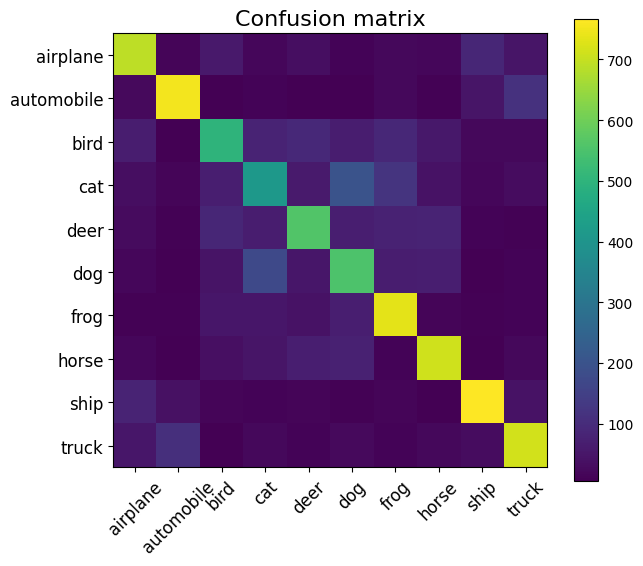

In [46]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [47]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.6395


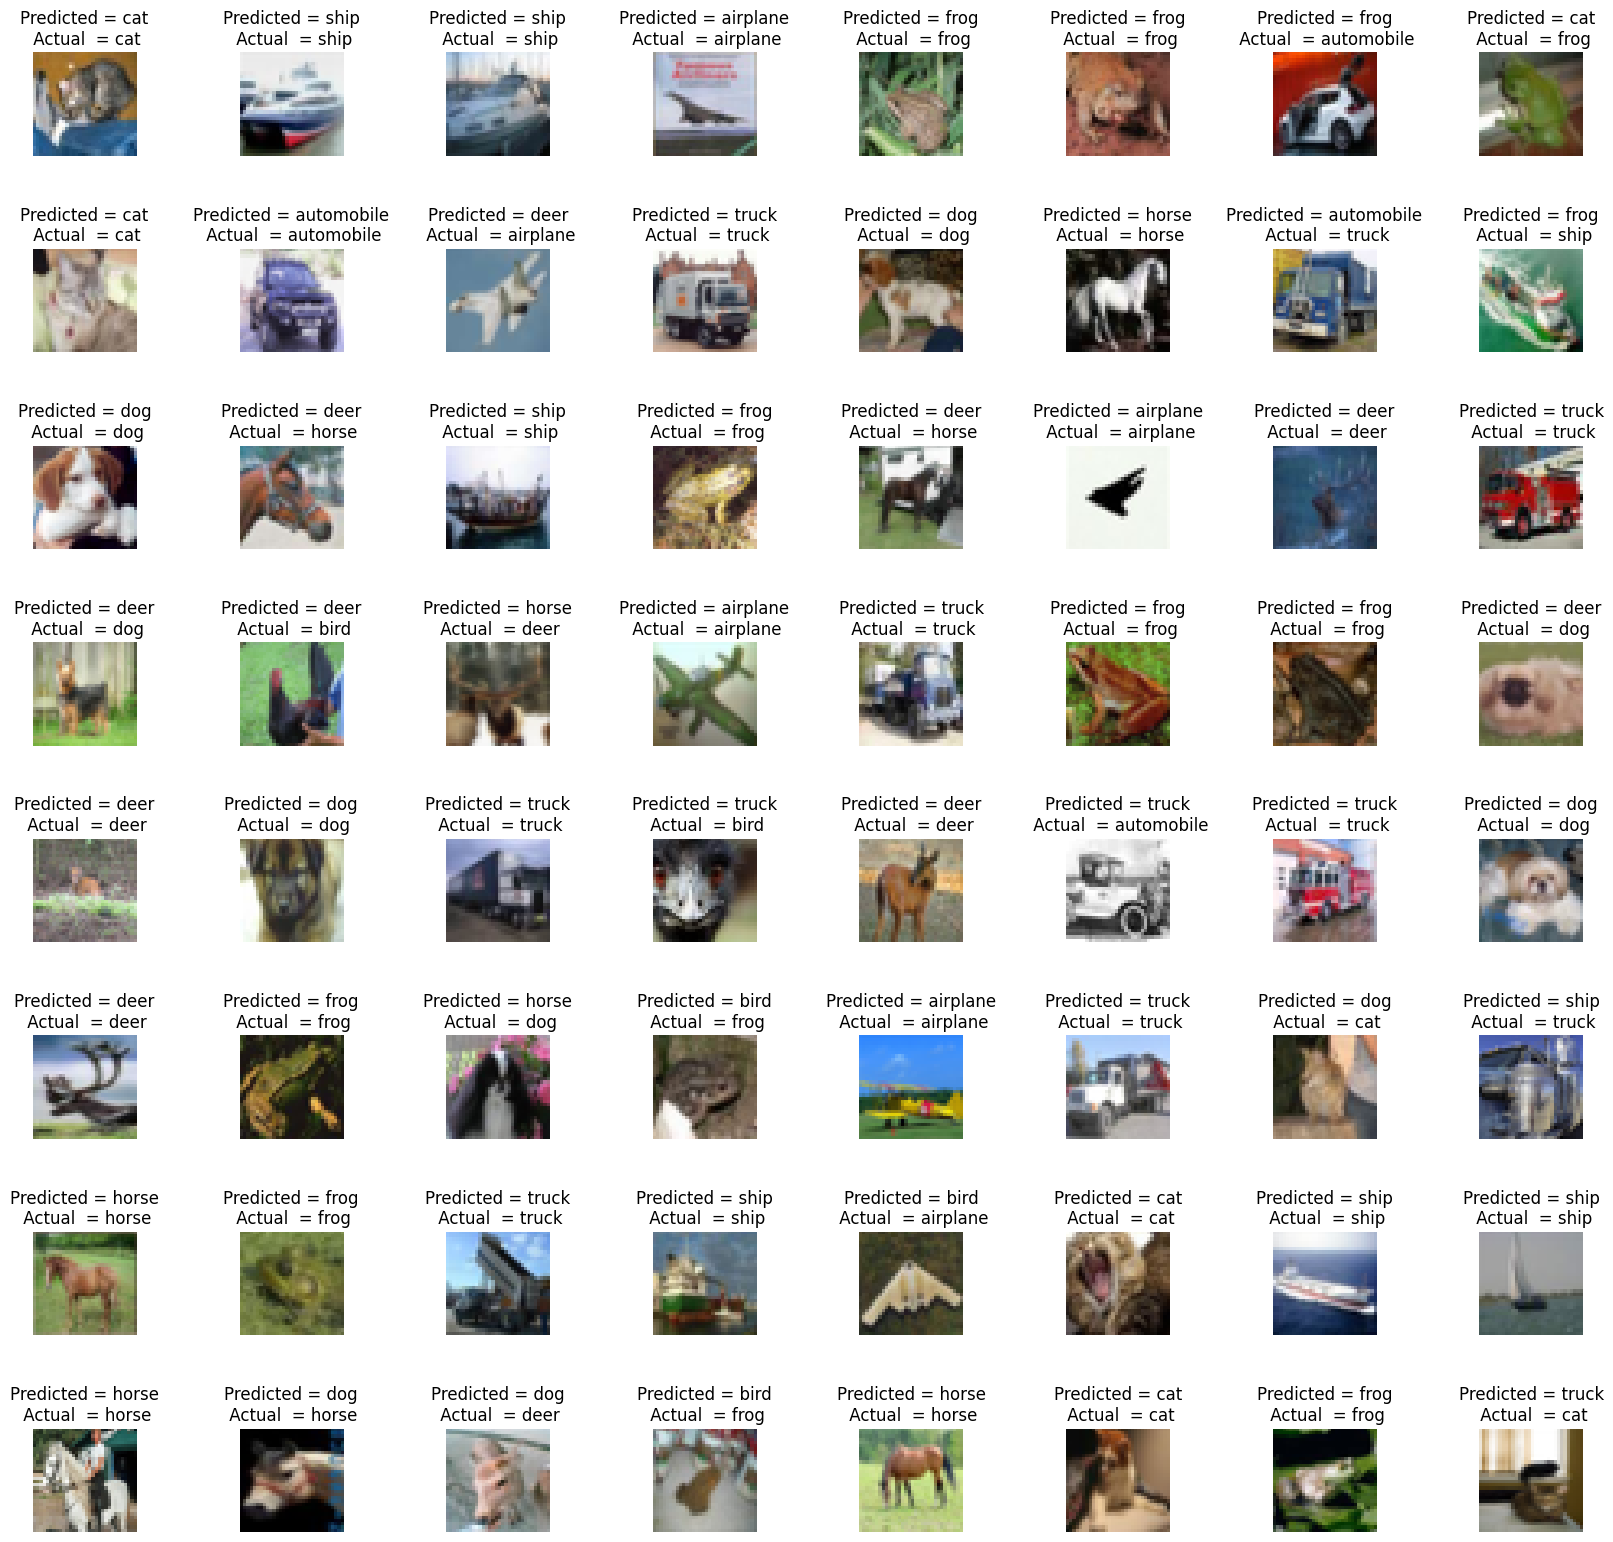

In [48]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [103]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(11,11),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(4096, activation='relu'))
AlexNet.add(Dropout(0.5))
AlexNet.add(Dense(4096, activation='relu'))
AlexNet.add(Dropout(0.5))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 6, 6, 16)          5824      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 3, 3, 60)          24060     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 2, 2, 60)         0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 2, 2, 60)          32460     
                                                                 
 conv2d_105 (Conv2D)         (None, 2, 2, 30)        

In [110]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# define early stopping callback
earlystop = EarlyStopping(monitor='val_loss', patience=5)

# compile model
AlexNet.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# fit model with callbacks
history = AlexNet.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), callbacks=[earlystop],verbose=1)

Epoch 1/50
1563/1563 [==============================] - 13s 6ms/step - loss: 2.0881 - accuracy: 0.1795 - val_loss: 1.8452 - val_accuracy: 0.2964
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7712 - accuracy: 0.3294 - val_loss: 1.6706 - val_accuracy: 0.3578
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6495 - accuracy: 0.3915 - val_loss: 1.5894 - val_accuracy: 0.4165
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5902 - accuracy: 0.4226 - val_loss: 1.5480 - val_accuracy: 0.4264
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5533 - accuracy: 0.4366 - val_loss: 1.5612 - val_accuracy: 0.4386
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5283 - accuracy: 0.4467 - val_loss: 1.5326 - val_accuracy: 0.4420
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5043 - accuracy: 0.4584 - val_loss: 1.5107 - val_accuracy

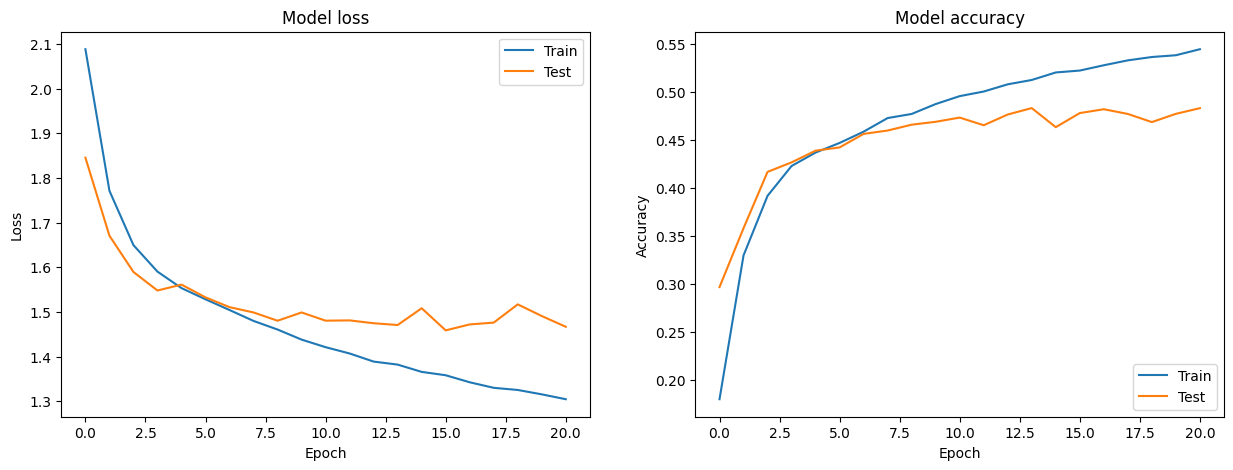

In [111]:
import matplotlib.pyplot as plt

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation accuracy
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].set_title('Model accuracy')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='lower right')

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper right')

plt.show()


In [112]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 2ms/step


array([[468,  30,  50,  36,  38,   5,  24,  29, 234,  86],
       [ 23, 545,  10,  24,   9,  10,  20,  22, 130, 207],
       [ 64,  16, 348,  73, 208,  60,  92,  87,  26,  26],
       [ 13,  13, 113, 305,  81, 191, 136,  81,  25,  42],
       [ 41,  13, 125,  65, 415,  28, 125, 130,  37,  21],
       [ 11,   8,  92, 243,  61, 360,  67, 113,  21,  24],
       [  4,  10,  52, 116, 160,  20, 571,  31,  16,  20],
       [ 18,   9,  38,  68,  75,  80,  29, 594,  15,  74],
       [ 66,  60,  18,  36,  16,   9,  21,  11, 698,  65],
       [ 33, 166,  16,  46,  11,  13,  36,  47, 107, 525]])

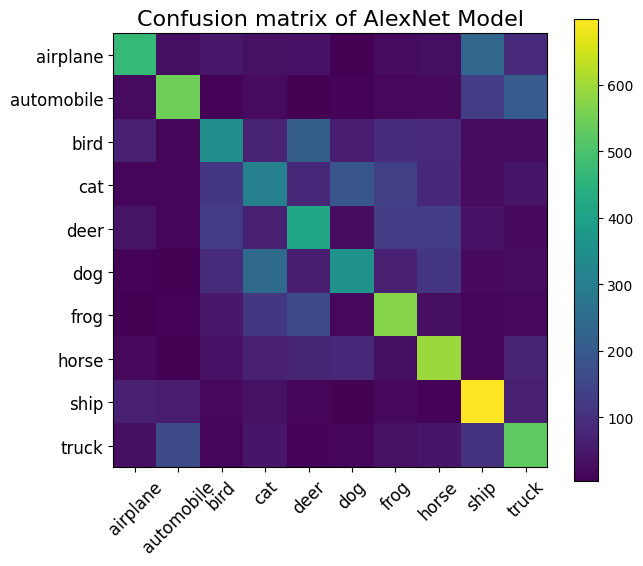

In [113]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [115]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

Test accuracy by AlexNet: 0.6395


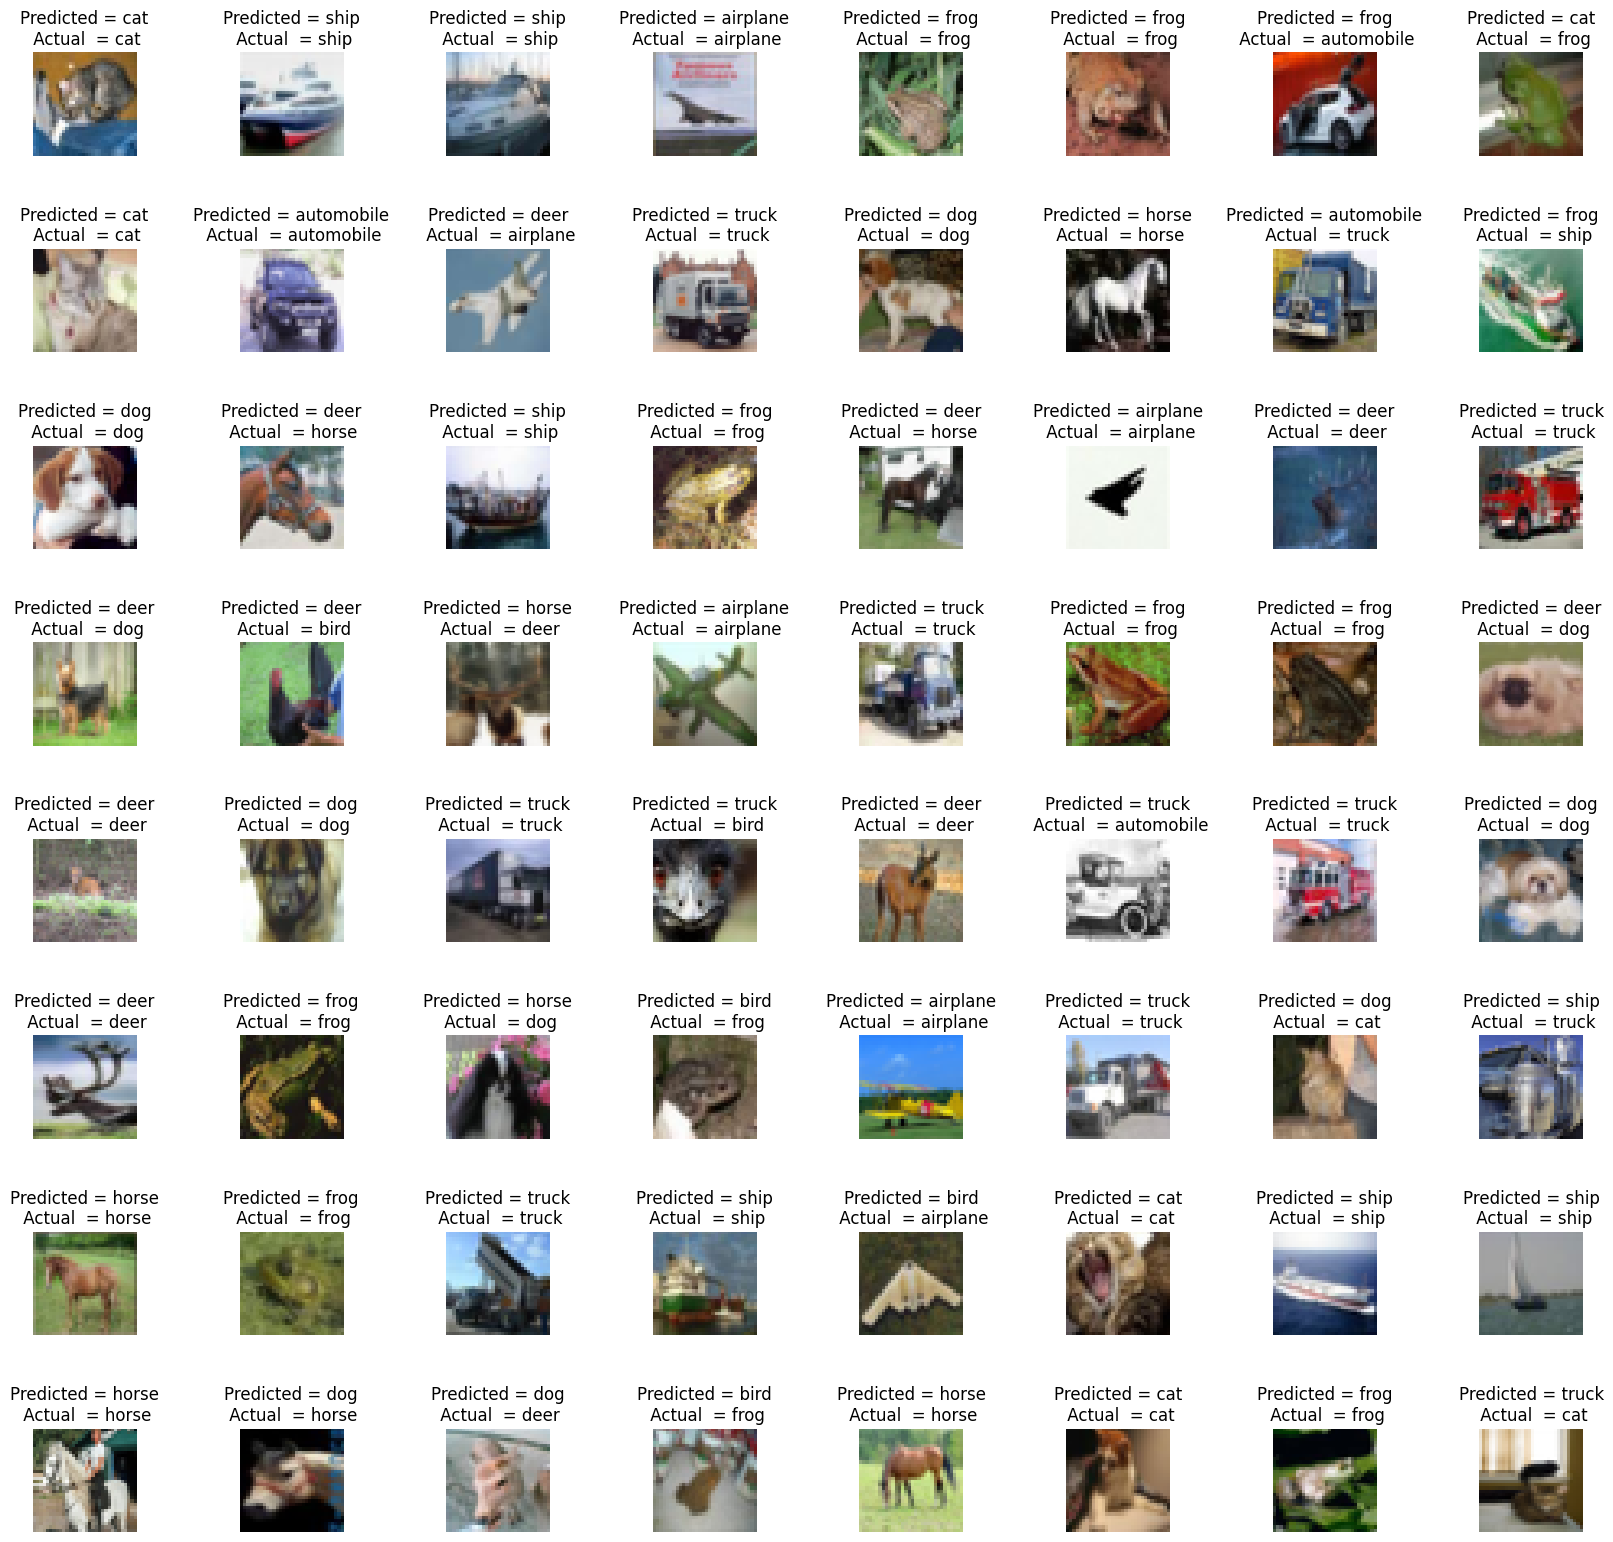

In [116]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

1/1 [==============================] - 0s 24ms/step


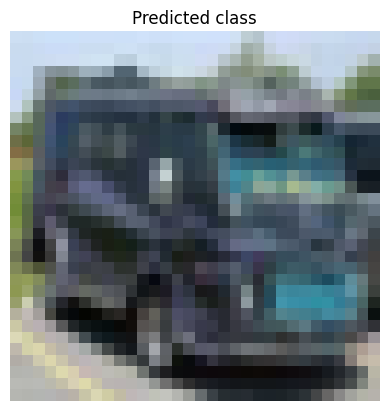

In [121]:
# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Choose a random image from the test set
index = np.random.randint(0, x_test.shape[0])
image = x_test[index]

# Make a prediction on the image using the pre-trained model
prediction = AlexNet.predict(np.expand_dims(image, axis=0))

class_index = tf.argmax(prediction, axis=1)
class_name = tf.keras.utils.to_categorical(class_index, num_classes=10)
actual_class = y_test[index]

# Visualize the image and the predicted and actual classes
plt.imshow(image)
plt.title(f"Predicted class")
plt.axis('off')
plt.show()